In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from backtest import calculate_portfolio_returns
from constants import *

In [2]:
df = calculate_portfolio_returns()

/root/projects/DIYAdaptiveAllocation/signals.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_weights["VUSTX_risk_weight"].loc[(ewma_cross.iloc[:, 0] > 0) & (ewma_cross.iloc[:, 1] > 0)] = 0.0
/root/projects/DIYAdaptiveAllocation/signals.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_weights["VUSTX_risk_weight"].loc[(ewma_cross.iloc[:, 0] > 0) & (ewma_cross.iloc[:, 1] <= 0)] = 0.25
/root/projects/DIYAdaptiveAllocation/portfolio.py:166: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariances = np.cov(rets[1:].T)
/root/mambaforge/envs/rapids-23.06/lib/python3.10/site-packages/numpy/lib/function

risk weights sum to 1
it took 0.018871068954467773 seconds to perform the rolling optimization
One or more periods do not have investment equal to 1. Creating residual weights.


/root/mambaforge/envs/rapids-23.06/lib/python3.10/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/root/mambaforge/envs/rapids-23.06/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Stats for Portfolio Returns Relative from 1995-01-30 00:00:00 - 2023-07-03 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1200.55%            0.99  9.45%   -28.48%

Annualized Returns:
mtd     3m     6m      ytd     1y     3y     5y     10y    incep.
------  -----  ------  ------  -----  -----  -----  -----  --------
-0.03%  4.76%  12.25%  12.95%  5.85%  1.81%  6.11%  8.34%  9.45%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.99     1.09       0.92
mean    9.50%    9.38%      8.96%
vol     9.61%    8.58%      9.76%
skew    -0.37    -0.41      -1.29
kurt    8.01     1.57       3.91
best    5.30%    8.10%      26.21%
worst   -6.73%   -8.86%     -24.34%

Drawdowns:
max      avg       # days
-------  ------  --------
-28.48%  -1.26%     20.96

Misc:
---------------  ------
avg. up month    2.16%
avg. down month  -1.70%
up year %        85

<Axes: xlabel='Date'>

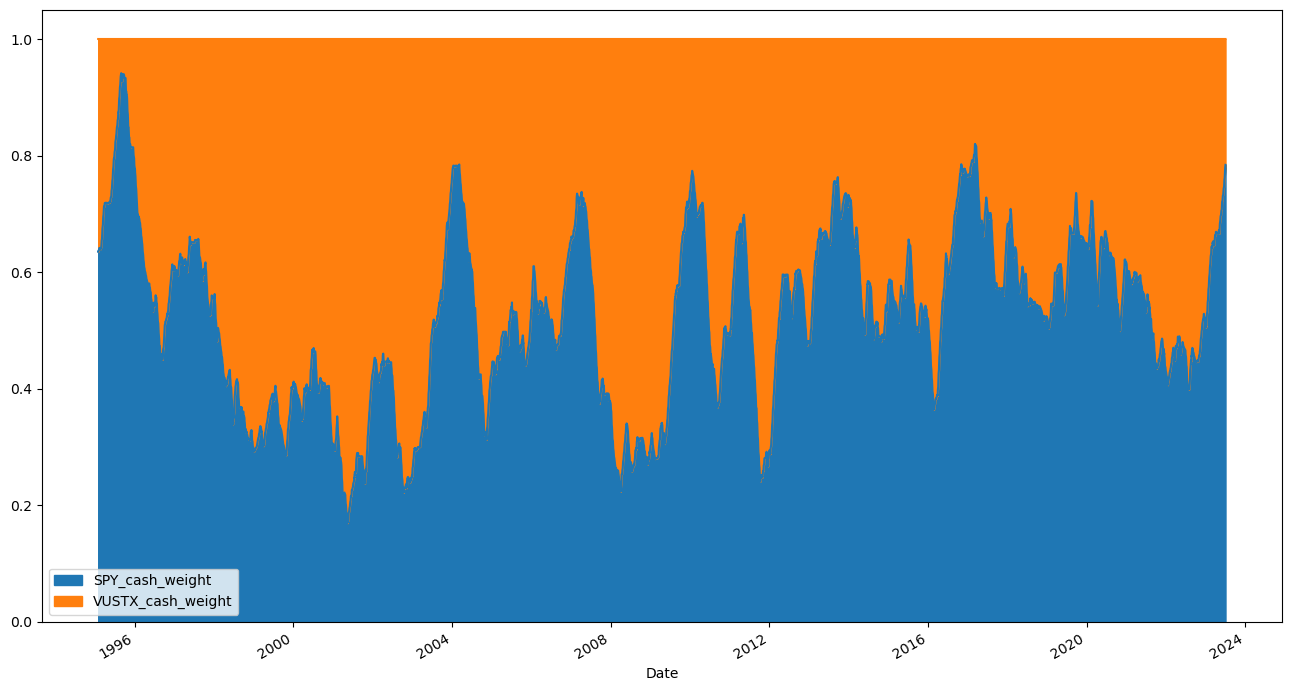

In [3]:
%matplotlib inline
df[CASH_WEIGHTS].plot.area(figsize=(16, 9), stacked=True)

<Axes: xlabel='Date'>

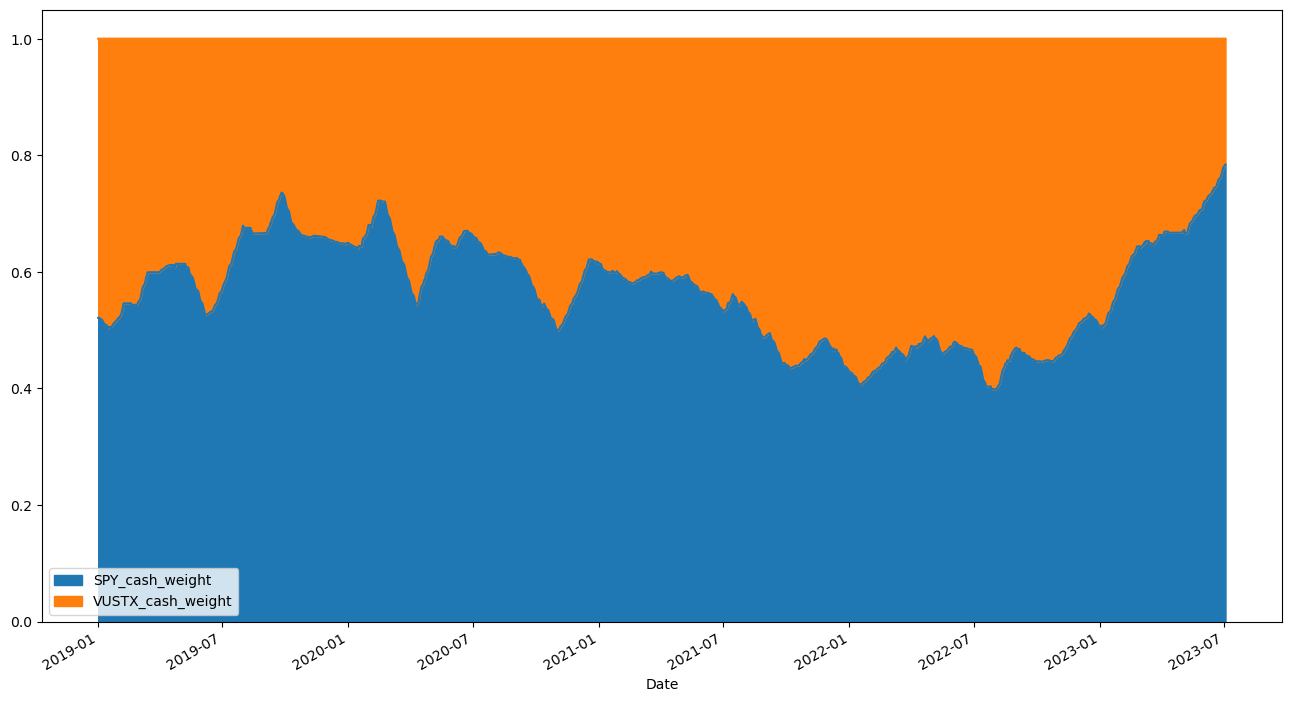

In [4]:
df[df.index > "2019-01-01"][CASH_WEIGHTS].plot.area(figsize=(16, 9), stacked=True)

<Axes: xlabel='Date'>

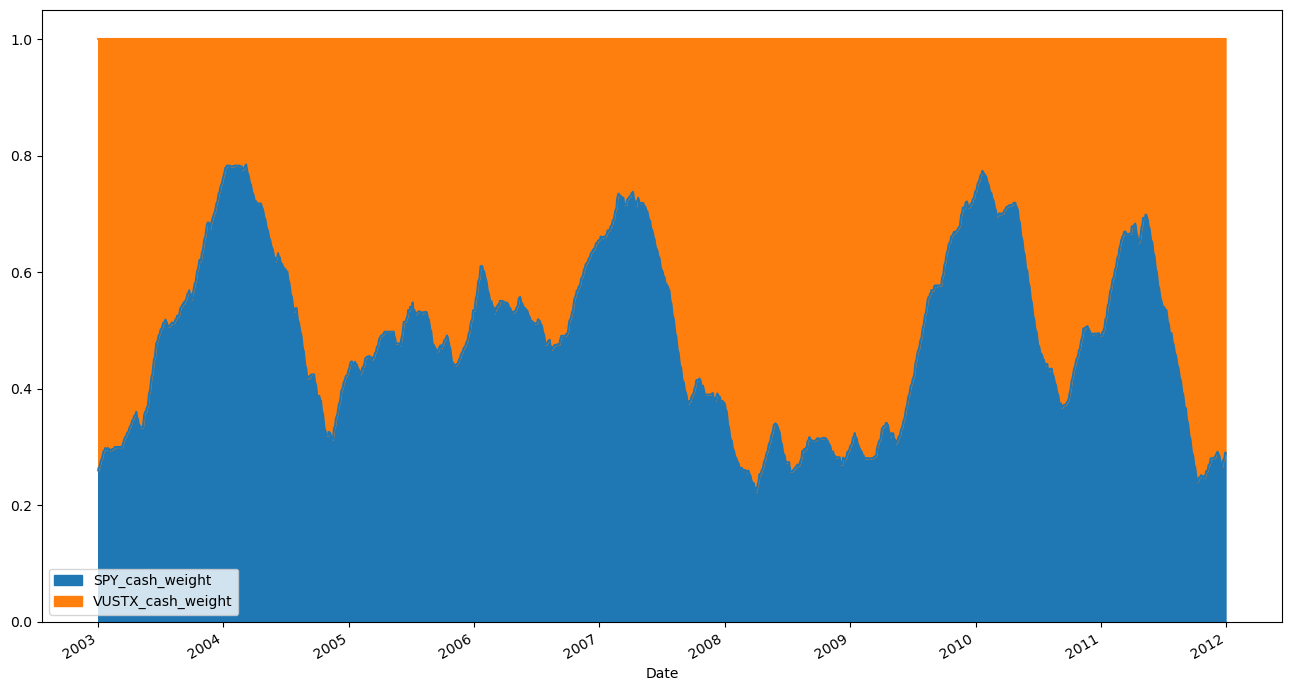

In [5]:
df[(df.index > '2003-01-01') & (df.index <= '2012-01-01')][CASH_WEIGHTS].plot.area(figsize=(16, 9), stacked=True)

<Axes: xlabel='Date'>

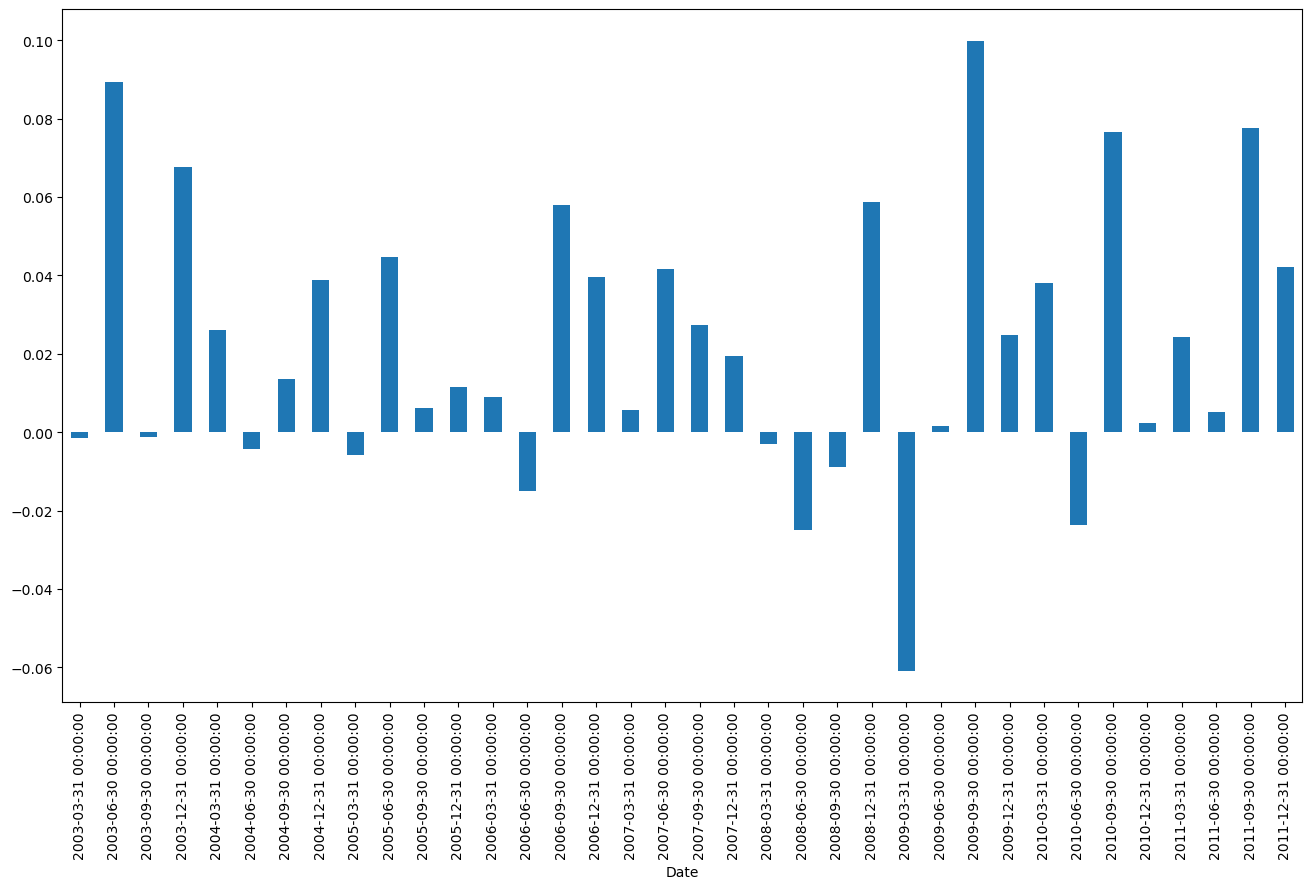

In [6]:
df["Daily Portfolio Returns"][(df.index > '2003-01-01') & (df.index <= '2012-01-01')].resample("Q").apply(lambda x: (1 + x).prod() - 1).plot.bar(figsize=(16, 9))